This notebook tests the creation of the example map from the original paper of the spatial reasoning architecture. 

In [1]:
import sys
sys.path.append('../cedar_utils/')
from create_model import create_model
sys.path.append('../simulations/')
from plotting import plot_0d, plot_1d, plot_2d
import nengo
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SAVE_SIMULATION = False

In [3]:
tau_factor = 0.15
model, nengo_objects, probes = create_model('../JSON/mental_imagery_extended.json',
                                    tau_factor=tau_factor)

Component Multiply 20 does not have 2 inputs, but 0!
The object Static Gain 23 does not have a source!


In [4]:
sim = nengo.Simulator(model)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [5]:
# Supply first sentence: There is a cyan object above a green object
nengo_objects['Reference: Green'].active = True
nengo_objects['Target: Cyan'].active = True
nengo_objects['Spatial relation: Above'].active = True

sim.run_steps(int(500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [6]:
# Activate imagine node
nengo_objects['Reference: Green'].active = False
nengo_objects['Target: Cyan'].active = False
nengo_objects['Spatial relation: Above'].active = False
nengo_objects['Action: Imagine'].active = True

sim.run_steps(int(8500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [7]:
# Supply second sentence: There is a red object to the left of the green object
nengo_objects['Reference: Green'].active = True
nengo_objects['Target: Red'].active = True
nengo_objects['Spatial relation: Left'].active = True

sim.run_steps(int(500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [8]:
nengo_objects['Reference: Green'].active = False
nengo_objects['Target: Red'].active = False
nengo_objects['Spatial relation: Left'].active = False

sim.run_steps(int(8500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [9]:
# Supply third sentence: There is a blue object to the right of the red object
nengo_objects['Reference: Red'].active = True
nengo_objects['Target: Blue'].active = True
nengo_objects['Spatial relation: Right'].active = True

sim.run_steps(int(500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [10]:
nengo_objects['Reference: Red'].active = False
nengo_objects['Target: Blue'].active = False
nengo_objects['Spatial relation: Right'].active = False

sim.run_steps(int(8500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [11]:
# supply fourth sentence: There is an orange object to the left of the blue object
nengo_objects['Reference: Blue'].active = True
nengo_objects['Target: Orange'].active = True
nengo_objects['Spatial relation: Left'].active = True

sim.run_steps(int(500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [12]:
nengo_objects['Reference: Blue'].active = False
nengo_objects['Target: Orange'].active = False
nengo_objects['Spatial relation: Left'].active = False

sim.run_steps(int(8500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [13]:
sim.close()

In [14]:
# save simulation results
from datetime import datetime
import os 
timestamp = str(datetime.now()).rsplit('.',1)[0]
print(timestamp)

if SAVE_SIMULATION:
    os.mkdir('../simulation_data/%s' %timestamp)
    for ob_key in probes:
        file_name = ob_key.replace('/','_')
        np.save('../simulation_data/%s/%s_%s' %(timestamp, file_name, timestamp), sim.data[probes[ob_key]])

2020-02-27 19:18:22


# Plot simulation

In [16]:
# for tau_factor 0.05 show every third step, for other tau_factors show a multiple 
# thereof
num_samples = sim.data[probes['Reference Blue Memory']].shape[0]
print('Number of samples:', num_samples)

if num_samples > 150:
    stepsize = 5 * round(tau_factor / 0.05)
    print("Number of samples:", num_samples, 'Stepsize:', stepsize)
    time_points = np.arange(0, num_samples, stepsize)[-36:]
    
else:
    time_points = np.arange(0, num_samples, 2)[-36:]
print("time_points: \n", time_points, len(time_points))

from cedar_modules import AbsSigmoid
sigmoid = AbsSigmoid()

Number of samples: 540
Number of samples: 540 Stepsize: 15
time_points: 
 [  0  15  30  45  60  75  90 105 120 135 150 165 180 195 210 225 240 255
 270 285 300 315 330 345 360 375 390 405 420 435 450 465 480 495 510 525] 36


## Color and Relation fields 0-dimensional

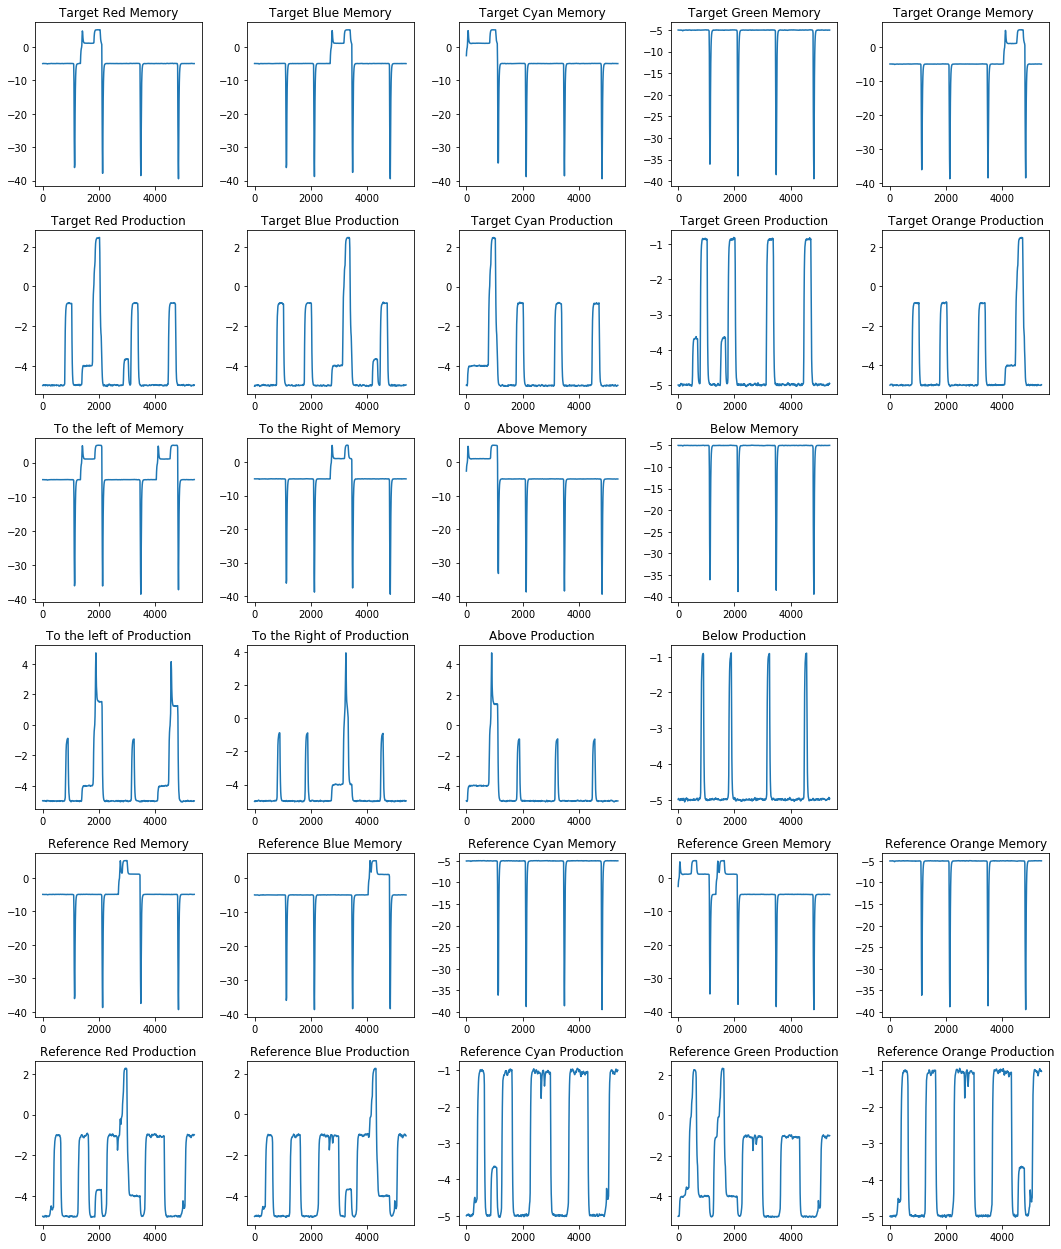

In [17]:
plot_0d(sim, probes)

## Color

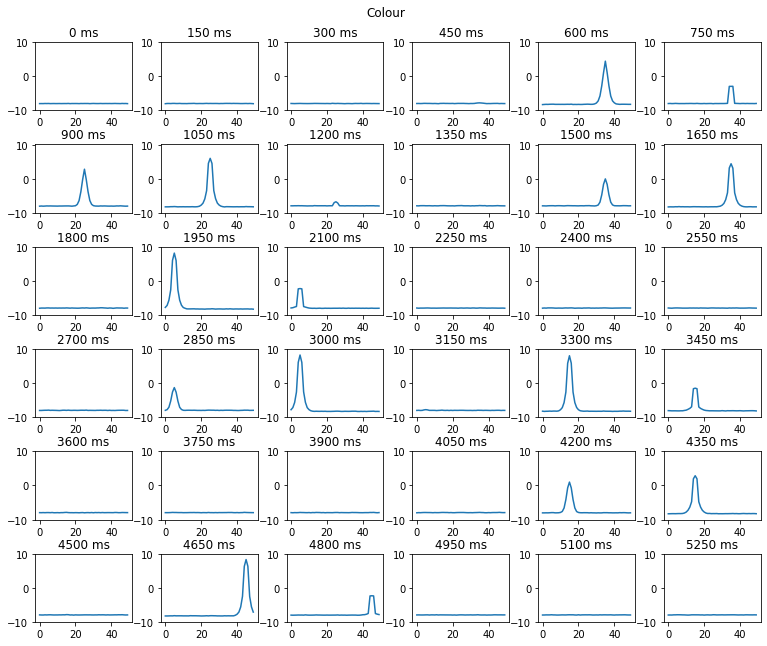

In [18]:
colour_data = sim.data[probes['Colour']]
plot_1d(colour_data, time_points, title='Colour', save=False)

## Spatial Scene

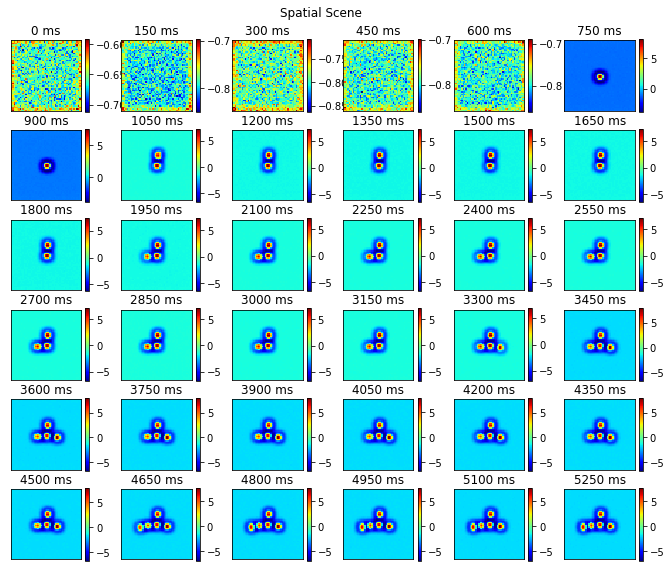

In [19]:
spatial_scene = sim.data[probes['Indeterminent ']]
plot_2d(spatial_scene, time_points, colorbar=True, title='Spatial Scene', save=False)

## Object-centered

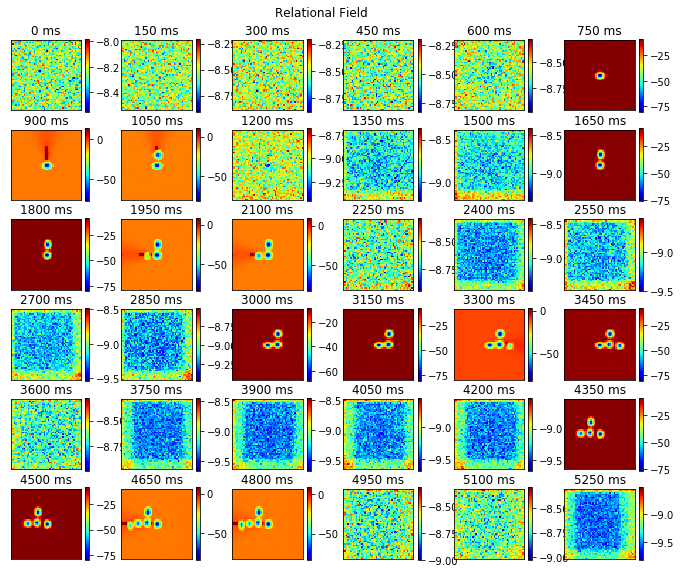

In [20]:
# Object-centered = relational field in the Plotting widget
object_centered_data = sim.data[probes['Object-centered ']]
plot_2d(object_centered_data, time_points, colorbar=True, title='Relational Field', save=False)

## Target

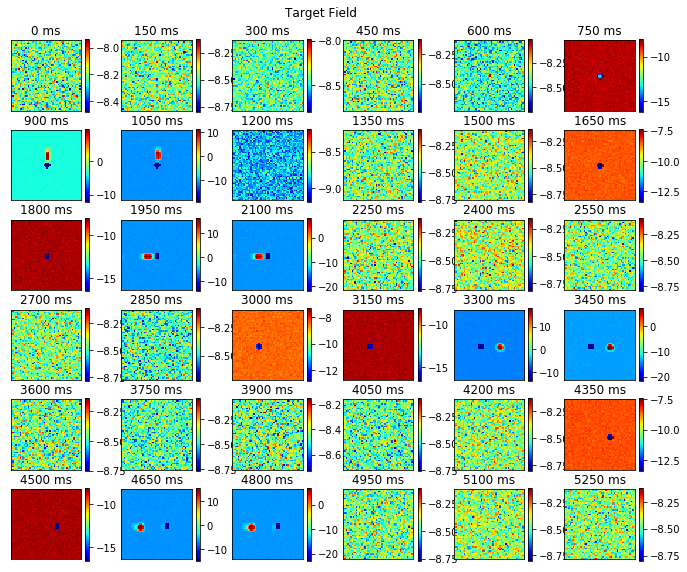

In [21]:
target = sim.data[probes['Target']]
plot_2d(target, time_points, colorbar=True, title='Target Field', save=False)

## Reference

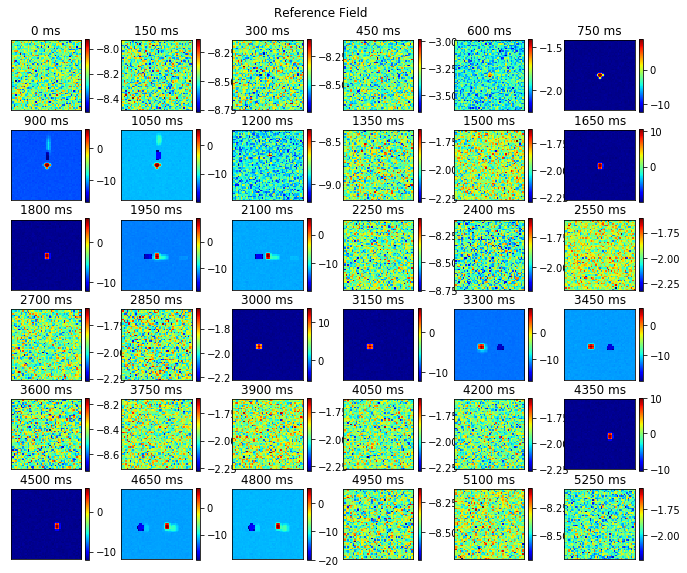

In [22]:
reference_data = sim.data[probes['Reference']]
plot_2d(reference_data, time_points, colorbar=True, title='Reference Field', save=False)